In [34]:
# Imports
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Pytorch Gpu Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

import matplotlib.pyplot as plt

# Matplotlib svg plots for better pictures
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

import seaborn as sns
import pandas as pd
from torchsummary import summary

# Sklearn
from sklearn.model_selection import train_test_split

In [35]:
# Import dataset
iris = pd.read_csv(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
)

# Convert dataset from pandas datafram to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species == "setosa"] = (
    0  # We don't need this line as torch.zeros initialize the tensor with zeros
)
labels[iris.species == "versicolor"] = 1
labels[iris.species == "virginica"] = 2

# Train Test split manual


In [36]:
# Seperate data into train and test sets

# Training Examples
propTrain = 0.8  # in proportion not percent
nTraining = int(len(labels) * propTrain)

# initialize a boolean vector to select data and labels
trainTestBool = np.zeros(len(labels), dtype=bool)

# trainTestBool[range(nTraining)] = True # Not the right way to do the split because it will not randomise data

# This is the better way
items2use4train = np.random.choice(range(len(labels)), nTraining, replace=False)
trainTestBool[items2use4train] = True


print(trainTestBool)

[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True False  True False False False False False  True  True
 False  True  True False  True  True False  True  True  True False  True
 False  True  True  True  True  True False  True False  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True  True  True False  True
  True False  True  True  True False  True  True False  True False False
  True  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True]


In [ ]:
# Let's check wether train and test are balanced or not?
print(f"Average of full data: {torch.mean(labels.float())}")
print(" ")
print(f"Average of training data: {torch.mean(labels[trainTestBool].float())}")
print(" ")
print(f"Average of test data: {torch.mean(labels[~trainTestBool].float())}")
print(" ")

Average of full data: 1.0
 
Average of training data: 1.008333444595337
 
Average of test data: 0.9666666984558105
 


In [ ]:
# Model
NNModelIris = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 3)
)
# Loss Function
lossFun = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(NNModelIris.parameters(), lr=0.01)

In [ ]:
# Complete Dataset Shape
print(f"Complete data shape: {data.shape}")
# Training Dataset Shape
print(f"Training data shape: {data[trainTestBool, :].shape}")
# Testing Dataset Shape
print(f"Testing data shape: {data[~trainTestBool, :].shape}")

Complete data shape: torch.Size([150, 4])
Training data shape: torch.Size([120, 4])
Testing data shape: torch.Size([30, 4])


In [ ]:
# Train the model

nEpochs = 1000

# initialize losses
losses = torch.zeros(nEpochs)
ongoingAcc = []

# Loop over epochs
for epoch in range(nEpochs):

    # Forward pass
    yHat = NNModelIris(data[trainTestBool, :])

    # Compute accuracy
    ongoingAcc.append(
        100
        * torch.mean(
            (torch.argmax(yHat, axis=1) == labels[trainTestBool]).cpu().float()
        )
    )

    # Compute Loss
    loss = lossFun(yHat, labels[trainTestBool])
    losses[epoch] = loss

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
# Test the model

# Compute train accuracy
predictions_train = NNModelIris(data[trainTestBool, :])
trainAccuracy = 100 * torch.mean(
    (torch.argmax(predictions_train, axis=1) == labels[trainTestBool]).cpu().float()
)

# Compute Test accuracy
predictions_test = NNModelIris(data[~trainTestBool, :])
testAccuracy = 100 * torch.mean(
    (torch.argmax(predictions_test, axis=1) == labels[~trainTestBool]).cpu().float()
)

print(f"Final Train accuracy: {trainAccuracy}")
print(f"Final test accuracy: {testAccuracy}")

Final Train accuracy: 98.33333587646484
Final test accuracy: 96.66666412353516


# Train Test Split Using sklearn train_test_split


In [ ]:
fakeData = (
    np.tile(np.array([1, 2, 3, 4]), (10, 1)) + np.tile(10 * np.arange(1, 11), (4, 1)).T
)
fakeLabels = np.arange(10) > 4
fakeData, fakeLabels

(array([[ 11,  12,  13,  14],
        [ 21,  22,  23,  24],
        [ 31,  32,  33,  34],
        [ 41,  42,  43,  44],
        [ 51,  52,  53,  54],
        [ 61,  62,  63,  64],
        [ 71,  72,  73,  74],
        [ 81,  82,  83,  84],
        [ 91,  92,  93,  94],
        [101, 102, 103, 104]]),
 array([False, False, False, False, False,  True,  True,  True,  True,
         True]))

In [ ]:
# Use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(
    fakeData, fakeLabels, test_size=0.2, train_size=0.8
)

# print out the sizes
print("Training data size: " + str(train_data.shape))
print("Test data size: " + str(test_data.shape))
print(" ")

# print out the train/test data
print("Training data: ")
print(train_data)
print(" ")

print("Test data: ")
print(test_data)

Training data size: (8, 4)
Test data size: (2, 4)
 
Training data: 
[[ 21  22  23  24]
 [ 71  72  73  74]
 [ 41  42  43  44]
 [ 91  92  93  94]
 [ 51  52  53  54]
 [101 102 103 104]
 [ 81  82  83  84]
 [ 11  12  13  14]]
 
Test data: 
[[61 62 63 64]
 [31 32 33 34]]


In [66]:
# a function that creates the ANN model


def createANewModel():

    # model architecture
    ANNiris = nn.Sequential(
        nn.Linear(4, 64),  # input layer
        nn.ReLU(),  # activation unit
        nn.Linear(64, 64),  # hidden layer
        nn.ReLU(),  # activation unit
        nn.Linear(64, 3),  # output units
    )

    # loss function
    lossFun = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

    return ANNiris, lossFun, optimizer

In [68]:
# train the model

# global parameter
numepochs = 200


def trainTheModel(trainProp):

    # initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    # loop over epochs
    for epochi in range(numepochs):

        # separate train from test data
        # Note 1: unique split for each epoch!
        # Note 2: here we specify the training size, not the testing size!
        X_train, X_test, y_train, y_test = train_test_split(
            data, labels, train_size=trainProp
        )

        # forward pass and loss
        yHat = ANNiris(X_train)
        loss = lossFun(yHat, y_train)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # compute training accuracy
        trainAcc.append(
            100 * torch.mean((torch.argmax(yHat, axis=1) == y_train).float()).item()
        )

        # test accuracy
        predlabels = torch.argmax(ANNiris(X_test), axis=1)
        testAcc.append(100 * torch.mean((predlabels == y_test).float()).item())

    # function output
    return trainAcc, testAcc

In [69]:
# Create a model
ANNiris, lossFun, optimizer = createANewModel()

# Train the model
trainAcc, testAcc = trainTheModel(0.8)

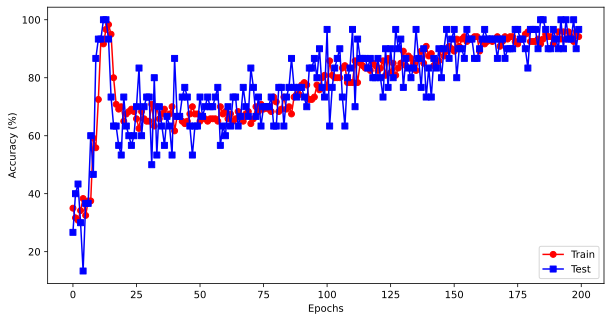

In [70]:
# plot the results
fig = plt.figure(figsize=(10, 5))

plt.plot(trainAcc, "ro-")
plt.plot(testAcc, "bs-")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend(["Train", "Test"])
plt.show()

# Train Test Accuracy over traing and testing sizes

In [71]:
trainSetSizes = np.linspace(0.2, 0.95, 10)

allTrainAcc = np.zeros((len(trainSetSizes), numepochs))
allTestAcc = np.zeros((len(trainSetSizes), numepochs))

for i in range(len(trainSetSizes)):

    # Create a model
    trainAcc, testAcc = trainTheModel(trainSetSizes[i])

    # Store the results
    allTrainAcc[i, :] = trainAcc
    allTestAcc[i, :] = testAcc

print(trainAcc)

[97.88731932640076, 99.29577112197876, 97.88731932640076, 97.88731932640076, 98.591548204422, 97.88731932640076, 98.591548204422, 99.29577112197876, 97.88731932640076, 97.88731932640076, 98.591548204422, 100.0, 98.591548204422, 97.88731932640076, 97.88731932640076, 98.591548204422, 99.29577112197876, 97.88731932640076, 97.88731932640076, 97.88731932640076, 97.88731932640076, 97.88731932640076, 99.29577112197876, 97.88731932640076, 97.88731932640076, 97.88731932640076, 97.88731932640076, 98.591548204422, 98.591548204422, 97.88731932640076, 97.88731932640076, 97.88731932640076, 98.591548204422, 98.591548204422, 98.591548204422, 98.591548204422, 97.88731932640076, 97.88731932640076, 97.88731932640076, 97.88731932640076, 97.88731932640076, 98.591548204422, 97.88731932640076, 98.591548204422, 98.591548204422, 97.88731932640076, 97.88731932640076, 98.591548204422, 98.591548204422, 98.591548204422, 97.88731932640076, 98.591548204422, 98.591548204422, 97.88731932640076, 97.88731932640076, 98.5